# 2장 코드 따라하기

## 2.3.1 예제에 사용할 dataset

### - forge dataset은 인위적으로 만든 이진 분류 dataset입니다.

In [1]:
# %load basic.py
from IPython.display import display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


X.shape : (26, 2)


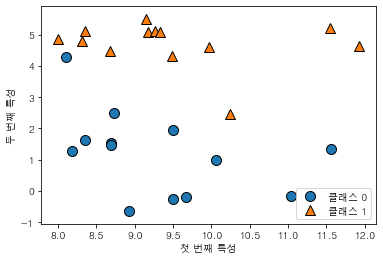

In [2]:
# dataset을 만듭니다.
X, y = mglearn.datasets.make_forge()

# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape :", X.shape)
plt.show();

### - wave dataset은 회귀 알고리즘 설명을 위해 인위적으로 만든 dataset입니다.

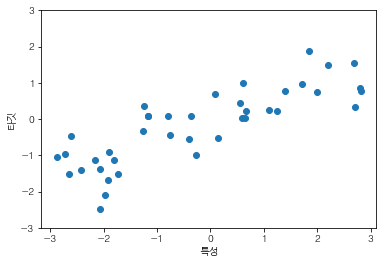

In [3]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")
plt.show();

### - 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암 dataset

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys :\n", cancer.keys())

cancer.keys :
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("유방암 데이터의 형태 :", cancer.data.shape)

유방암 데이터의 형태 : (569, 30)


In [6]:
print("클래스별 샘플 갯수 :\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수 :
 {'malignant': 212, 'benign': 357}


malignant는 악성, benign은 양성

In [7]:
print("특성 이름 :\n", cancer.feature_names)

특성 이름 :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### - 1970년대 보스턴 주택가격 dataset (회귀)

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 :", boston.data.shape)

데이터의 형태 : (506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape :", X.shape)

X.shape : (506, 104)


## 2.3.2 k-최근접 이웃 ( KNN 알고리즘 )

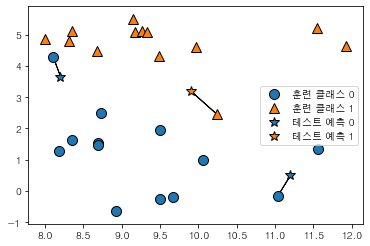

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 훈련 데이터 포인트 연결

-> 1-최근접 이웃 알고리즘의 예측은 같은색으로 연결한 포인트

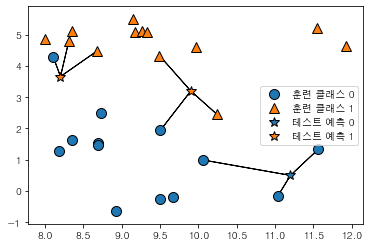

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 훈련 데이터 포인트 3개와 연결

-> 3-최근접 이웃 알고리즘의 예측은 1-최근접 이웃알고리즘의 예측결과와 다른 별 포인트가 생김!!

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
print("테스트 세트 예측 :", clf.predict(X_test))

테스트 세트 예측 : [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


### KNeighborsClassifier 분석

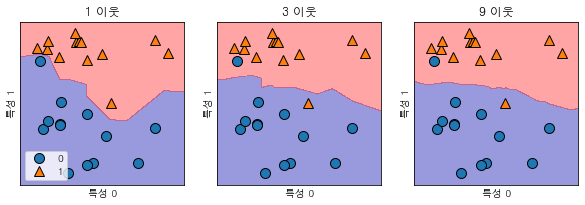

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n, ax in zip([1, 3, 9], axes):
    #fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} 이웃".format(n))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc = 3)
plt.show();

이웃의 수를 늘릴수록 결정 경계는 부드러워진다  ->  단순한 모델 (복잡도가 낮아짐)

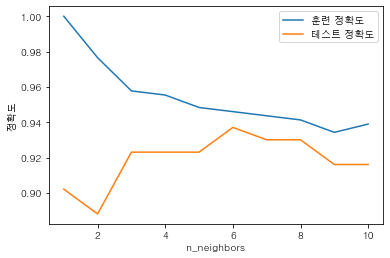

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
n_settings = range(1, 11)
for n in n_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(n_settings, training_accuracy, label = "훈련 정확도")
plt.plot(n_settings, test_accuracy, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend();

### k-최근접 이웃 회귀

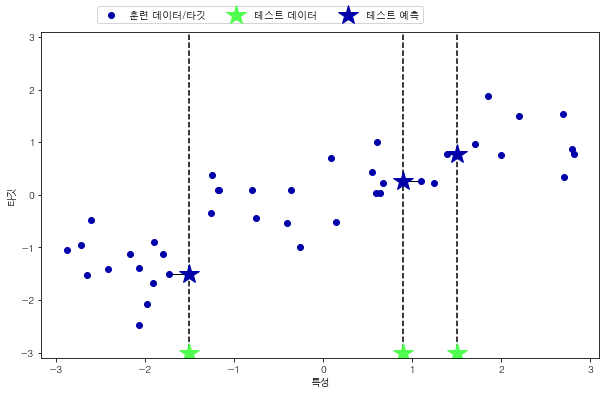

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 타깃값과 연결

-> 1-최근접 이웃 알고리즘의 예측은 그냥 가장 가까운 타깃값

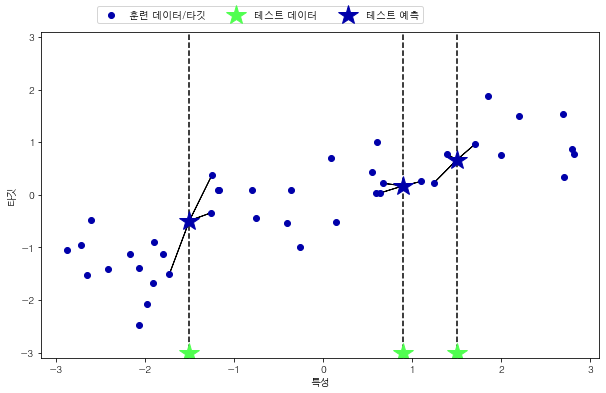

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

1. 별 모양 데이터 포인트 3개 추가
2. 별과 가장 가까운 3개의 타깃값과 연결

-> 3-최근접 이웃 알고리즘의 예측은 3개의 가장 가까운 타깃값의 평균!!

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# wave dataset을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors = 3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [22]:
print("테스트 세트 예측 :\n", reg.predict(X_test))

테스트 세트 예측 :
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


결정 계수 R^2값은 보통 0과 1사이의 값
- 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값의 평균으로만 예측한 경우
- 음수값은 예측과 타깃이 상반된 경향을 가지는 경우

In [23]:
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2 : 0.83


### KNeighborsRegressor 분석

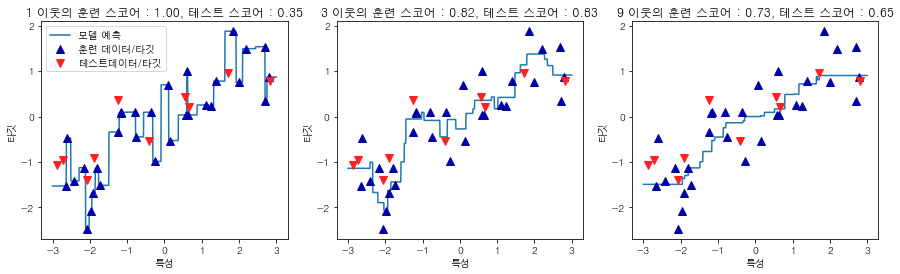

In [24]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

# -3과 2 사이에 1,000개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n, ax in zip([1, 3, 9], axes):
    #1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors = n)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title("{} 이웃의 훈련 스코어 : {:.2f}, 테스트 스코어 : {:.2f}".format(n, reg.score(X_train, y_train),
                                                                                 reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트데이터/타깃"], loc = "best")

이웃을 많이 사용하면 훈련데이터는 잘 안맞을 수 있지만 더 안정된 예측을 얻게 됩니다.

#### KNeighbors 분류기에 중요한 매개변수는 두 개!!
- 데이터 포인트 사이의 거리를 재는 방법 : 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식 사용
- 이웃의 수

## 2.3.3 선형 모델

### 회귀의 선형 모델

w[0]: 0.393906  b: -0.031804


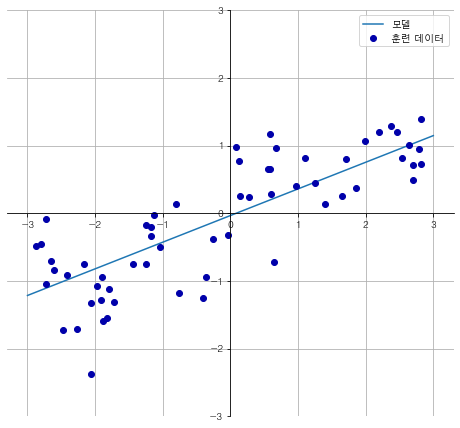

In [25]:
mglearn.plots.plot_linear_regression_wave()

특성이 많은 dataset이라면 선형 모델은 매우 훌륭한 성능을 낼 수 있습니다.  
특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 (훈련세트에 대해서) 선형 함수로 모델링할 수 있습니다.

### 선형 회귀 (최소제곱법)

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
print("lr.coef_ :", lr.coef_)               # 기울기 - Numpy 배열
print("lr.intercept_ :", lr.intercept_)     # 절편

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [28]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


훈련 세트와 테스트 세트의 R^2 점수가 매우 비슷한 것은 과소적합 상태를 의미합니다

In [29]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


고차원 dataset에서는 선형 모델의 성능이 매우 높아져 과대적합이 일어날 수 있습니다.  
훈련 데이터와 테스트 데이터 사이의 이런 성능 차이는 모델이 과적합되었다는 확실한 신호입니다.

### 리지(Ridge) 회귀

리지도 회귀를 위한 선형 모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용합니다.  
가중치 w의 모든 원소가 0에 가깝게 (모든 특성이 출력에 주는 영향을 최소한으로) 규제로 제한합니다.  
리지 회귀에 사용하는 규제 방식은 L2 규제!!

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


테스트 세트에 대한 점수는 LinearRegression보다 높습니다.  
-> 과대적합이 적고 일반화된 모델이 된다는 의미!  
alpha값을 높이면 계수를 0에 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있습니다.

In [34]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


alpah값을 줄이면 계수에 대한 제약이 풀려서 너무 일반화된 모델이 됩니다.  
(LinearRegression 모델과 거의 같아집니다.)

In [35]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


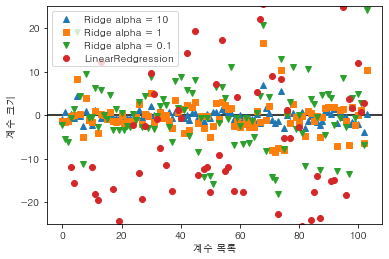

In [37]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRedgression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend();

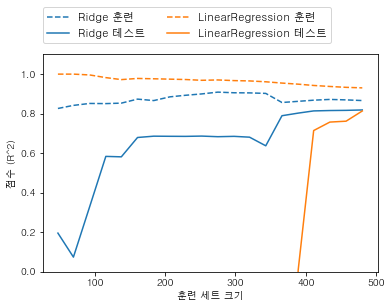

In [38]:
mglearn.plots.plot_ridge_n_samples()

보스턴 주택가격 데이터셋에 대한 리지 회귀와 선형 회귀의 학습 곡선

- 데이터가 많아질수록 두 모델의 성능은 좋아지고 마지막에 선형 회귀가 리지 회귀를 따라잡습니다.  
(데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것입니다.)  
- 선형 회귀의 훈련 데이터 성능이 감소하는 것은 데이터가 많아질수록 모델이 과대적합하기 어려워지기 때문입니다.

### 라소 (Lasso)

라소는 리지와 마찬가지로 계수를 0에 가깝게 만들지만 방식이 조금 달라 L1규제라고 합니다.

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 갯수 :", np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 갯수 : 4


In [43]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다.
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 갯수 :", np.sum(lasso001.coef_ != 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 갯수 : 33


In [44]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 갯수 :", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 갯수 : 96


alpha값을 낮추면 모델의 복잡도는 증가하여 성능이 좋아지지만  
너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해집니다.

Text(0, 0.5, '계수 크기')

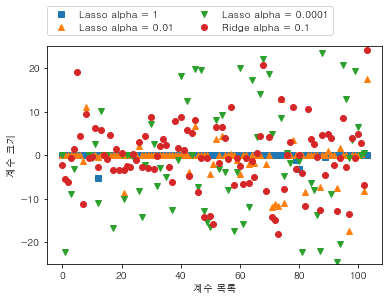

In [45]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0, 1.05));
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

보통은 리지 회귀를 선호하지만 특성이 많고 그 중 일부만 중요하다면 Lasso가 더 좋은 선택일 수 있습니다.  
또한 Lasso가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어줍니다.  
scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공합니다. (L1, L2 규제를 위한 매개변수 두 개를 조정해야 함)

### 분류용 선형 모델